<a href="https://colab.research.google.com/github/FeraMaks/test/blob/main/NN_ShaftTraectory_2_6_cnn_withSigm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
from numpy.core.memmap import uint8

from google.colab import drive

In [ ]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


##Загрузка данных

Эллиптические графики

In [ ]:
# Советую воспользоваться циклом for, чтобы не писать множество однотипных строк кода

data1 = pd.read_excel(open('/content/drive/MyDrive/work/0/001_19-12-03_1728_009-50_000.xlsx', 'rb'))
data1 = pd.DataFrame(data1)
data1 = pd.DataFrame.to_numpy(data1)
data1 = np.rot90(data1)
data1.shape

(6, 20000)

In [ ]:
data2 = pd.read_excel(open('/content/drive/MyDrive/work/0/001_19-12-05_1704_020_000.xlsx', 'rb'))
data2 = pd.DataFrame(data2)
data2 = pd.DataFrame.to_numpy(data2)
data2 = np.rot90(data2)
data2.shape

(6, 20000)

In [ ]:
data3 = pd.read_excel(open('/content/drive/MyDrive/work/0/001_19-12-05_1704_021_000.xlsx', 'rb'))
data3 = pd.DataFrame(data3)
data3 = pd.DataFrame.to_numpy(data3)
data3 = np.rot90(data3)
data3.shape

(6, 20000)

In [ ]:
data4 = pd.read_excel(open('/content/drive/MyDrive/work/0/001_19-12-05_1744_017-330_000.xlsx', 'rb'))
data4 = pd.DataFrame(data4)
data4 = pd.DataFrame.to_numpy(data4)
data4 = np.rot90(data4)
data4.shape

(6, 20000)

In [ ]:
data5 = pd.read_excel(open('/content/drive/MyDrive/work/0/001_19-12-05_1746_021_000.xlsx', 'rb'))
data5 = pd.DataFrame(data5)
data5 = pd.DataFrame.to_numpy(data5)
data5 = np.rot90(data5)
data5.shape

(6, 20000)

In [ ]:
data6 = pd.read_excel(open('/content/drive/MyDrive/work/0/001_19-12-05_1748_027-360_000.xlsx', 'rb'))
data6 = pd.DataFrame(data6)
data6 = pd.DataFrame.to_numpy(data6)
data6 = np.rot90(data6)
data6.shape

(6, 20000)

In [ ]:
data7 = pd.read_excel(open('/content/drive/MyDrive/work/0/001_19-12-05_1801_062-480_000.xlsx', 'rb'))
data7 = pd.DataFrame(data7)
data7 = pd.DataFrame.to_numpy(data7)
data7 = np.rot90(data7)
data7.shape

(6, 20000)

In [ ]:
#data8 = pd.read_excel(open('/content/drive/MyDrive/work/0/100_000.xlsx', 'rb'))
#data8 = pd.DataFrame(data8)
#data8 = pd.DataFrame.to_numpy(data8)
#data8 = np.rot90(data8)
#data8.shape

In [ ]:
#data9 = pd.read_excel(open('/content/drive/MyDrive/work/0/110_000.xlsx', 'rb'))
#data9 = pd.DataFrame(data9)
#data9 = pd.DataFrame.to_numpy(data9)
#data9 = np.rot90(data9)
#data9.shape

In [ ]:
#data10 = pd.read_excel(open('/content/drive/MyDrive/work/0/120_000.xlsx', 'rb'))
#data10 = pd.DataFrame(data10)
#data10 = pd.DataFrame.to_numpy(data10)
#data10 = np.rot90(data10)
#data10.shape

Метастабильные графики

In [ ]:
data11 = pd.read_excel(open('/content/drive/MyDrive/work/2/001_19-12-05_1625_001_222.xlsx', 'rb'))
data11 = pd.DataFrame(data11)
data11 = pd.DataFrame.to_numpy(data11)
data11 = np.rot90(data11)
data11.shape

(6, 20000)

In [ ]:
data12 = pd.read_excel(open('/content/drive/MyDrive/work/2/001_19-12-05_1625_002-10_222.xlsx', 'rb'))
data12 = pd.DataFrame(data12)
data12 = pd.DataFrame.to_numpy(data12)
data12 = np.rot90(data12)
data12.shape

(6, 20000)

In [ ]:
data13 = pd.read_excel(open('/content/drive/MyDrive/work/2/001_19-12-05_1625_003_222.xlsx', 'rb'))
data13 = pd.DataFrame(data13)
data13 = pd.DataFrame.to_numpy(data13)
data13 = np.rot90(data13)
data13.shape

(6, 20000)

In [ ]:
data14 = pd.read_excel(open('/content/drive/MyDrive/work/2/001_19-12-05_1737_016_222.xlsx', 'rb'))
data14 = pd.DataFrame(data14)
data14 = pd.DataFrame.to_numpy(data14)
data14 = np.rot90(data14)
data14.shape

(6, 20000)

In [ ]:
data15 = pd.read_excel(open('/content/drive/MyDrive/work/2/001_19-12-05_1739_005-290_222.xlsx', 'rb'))
data15 = pd.DataFrame(data15)
data15 = pd.DataFrame.to_numpy(data15)
data15 = np.rot90(data15)
data15.shape

(6, 20000)

In [ ]:
data16 = pd.read_excel(open('/content/drive/MyDrive/work/2/001_19-12-05_1739_006_222.xlsx', 'rb'))
data16 = pd.DataFrame(data16)
data16 = pd.DataFrame.to_numpy(data16)
data16 = np.rot90(data16)
data16.shape

(6, 20000)

In [ ]:
data17 = pd.read_excel(open('/content/drive/MyDrive/work/2/21_222.xlsx', 'rb'))
data17 = pd.DataFrame(data17)
data17 = pd.DataFrame.to_numpy(data17)
data17 = np.rot90(data17)
data17.shape

(6, 20000)

In [ ]:
#data18 = pd.read_excel(open('/content/drive/MyDrive/work/2/22_222.xlsx', 'rb'))
#data18 = pd.DataFrame(data18)
#data18 = pd.DataFrame.to_numpy(data18)
#data18 = np.rot90(data18)
#data18.shape

In [ ]:
#data19 = pd.read_excel(open('/content/drive/MyDrive/work/2/23_222.xlsx', 'rb'))
#data19 = pd.DataFrame(data19)
#data19 = pd.DataFrame.to_numpy(data19)
#data19 = np.rot90(data19)
#data19.shape

In [ ]:
#data20 = pd.read_excel(open('/content/drive/MyDrive/work/2/260_222.xlsx', 'rb'))
#data20 = pd.DataFrame(data20)
#data20 = pd.DataFrame.to_numpy(data20)
#data20 = np.rot90(data20)
#data20.shape

Графики с самопересечением

In [ ]:
data31 = pd.read_excel(open('/content/drive/MyDrive/work/1/11_111.xlsx', 'rb'))
data31 = pd.DataFrame(data31)
data31 = pd.DataFrame.to_numpy(data31)
data31 = np.rot90(data31)
data31.shape

(6, 20000)

In [ ]:
data32 = pd.read_excel(open('/content/drive/MyDrive/work/1/12_111.xlsx', 'rb'))
data32 = pd.DataFrame(data32)
data32 = pd.DataFrame.to_numpy(data32)
data32 = np.rot90(data32)
data32.shape

(6, 20000)

In [ ]:
data33 = pd.read_excel(open('/content/drive/MyDrive/work/1/13_111.xlsx', 'rb'))
data33 = pd.DataFrame(data33)
data33 = pd.DataFrame.to_numpy(data33)
data33 = np.rot90(data33)
data33.shape

(6, 20000)

In [ ]:
data34 = pd.read_excel(open('/content/drive/MyDrive/work/1/14_111.xlsx', 'rb'))
data34 = pd.DataFrame(data34)
data34 = pd.DataFrame.to_numpy(data34)
data34 = np.rot90(data34)
data34.shape

(6, 20000)

In [ ]:
data35 = pd.read_excel(open('/content/drive/MyDrive/work/1/15_111.xlsx', 'rb'))
data35 = pd.DataFrame(data35)
data35 = pd.DataFrame.to_numpy(data35)
data35 = np.rot90(data35)
data35.shape

(6, 20000)

In [ ]:
data36 = pd.read_excel(open('/content/drive/MyDrive/work/1/17_111.xlsx', 'rb'))
data36 = pd.DataFrame(data36)
data36 = pd.DataFrame.to_numpy(data36)
data36 = np.rot90(data36)
data36.shape

(6, 20000)

In [ ]:
data37 = pd.read_excel(open('/content/drive/MyDrive/work/1/18_111.xlsx', 'rb'))
data37 = pd.DataFrame(data37)
data37 = pd.DataFrame.to_numpy(data37)
data37 = np.rot90(data37)
data37.shape

(6, 20000)

Графики на валидацию

In [ ]:
data21 = pd.read_excel(open('/content/drive/MyDrive/work/0/0330.xlsx', 'rb'))
data21 = pd.DataFrame(data21)
data21 = pd.DataFrame.to_numpy(data21)
data21 = np.rot90(data21)
data21.shape

(6, 20000)

In [ ]:
data22 = pd.read_excel(open('/content/drive/MyDrive/work/0/0350.xlsx', 'rb'))
data22 = pd.DataFrame(data22)
data22 = pd.DataFrame.to_numpy(data22)
data22 = np.rot90(data22)
data22.shape

(6, 20000)

In [ ]:
data23 = pd.read_excel(open('/content/drive/MyDrive/work/2/330.xlsx', 'rb'))
data23 = pd.DataFrame(data23)
data23 = pd.DataFrame.to_numpy(data23)
data23 = np.rot90(data23)
data23.shape

(6, 20000)

In [ ]:
data24 = pd.read_excel(open('/content/drive/MyDrive/work/2/350.xlsx', 'rb'))
data24 = pd.DataFrame(data24)
data24 = pd.DataFrame.to_numpy(data24)
data24 = np.rot90(data24)
data24.shape

(6, 20000)

In [ ]:
data25 = pd.read_excel(open('/content/drive/MyDrive/work/1/val_111.xlsx', 'rb'))
data25 = pd.DataFrame(data25)
data25 = pd.DataFrame.to_numpy(data25)
data25 = np.rot90(data25)
data25.shape

(6, 20000)

In [ ]:
data26= pd.read_excel(open('/content/drive/MyDrive/work/1/16_111.xlsx', 'rb'))
data26 = pd.DataFrame(data26)
data26 = pd.DataFrame.to_numpy(data26)
data26 = np.rot90(data26)
data26.shape

(6, 20000)

##Подготовка датасета

In [222]:
#parameters
data_train_number = 21 # количество файлов с графиками на обучение
data_test_number = 6 # количество файлов с графиками на валидацию
num_samples = 20 # количество сэмплов в одном графике
point_number = 1000 # количество точек в одном графике
num_graphycs = 3 # количество графиков
num_grahp0 = 3 # кол-во эллиптических графиков
num_grahp1 = 3 # кол-во графиков с самопересечением
num_grahp2 = 3 # кол-во метастабильных графиков
inputs = []
inputs_test = []

Data for training

In [223]:
y0_train = np.zeros((num_grahp0*num_samples*7,1))
y1_train = np.ones((num_grahp1*num_samples*7,1))
y2_train = np.ones((num_grahp2*num_samples*7,1))
y2_train = y2_train*2
y_train = np.concatenate((y0_train, y1_train, y2_train))
#for i in range (5):
#  y = np.concatenate((y, y))
y_train, y_train.shape

(array([[0.],
        [0.],
        [0.],
        ...,
        [2.],
        [2.],
        [2.]]), (1260, 1))

In [224]:
data_x_train = np.concatenate((data1,data2,data3,data4,data5,data6,data7,data31,data32,data33,data34,data35,data36,data37,data11,data12,data13,data14,data15,data16,data17))
data_x_train.shape

(126, 20000)

In [225]:
for j in range (data_train_number*num_graphycs):
  for i in range (num_samples):
    inputs.append(np.concatenate((data_x_train[j*2,i*point_number:i*point_number+point_number], data_x_train[j*2+1,i*point_number:i*point_number+point_number])))
inputs = np.concatenate(inputs, axis=0)
x_train = np.reshape(inputs, (data_train_number*num_graphycs*num_samples,point_number*2))
# Тип данных  в нейросетях - float32. Можно и float64, но тогда модель нужно делать с таким типом данных.
#x = x.astype('float32')
x_train.shape

(1260, 2000)

In [226]:
data_train = np.concatenate((y_train,x_train), axis=1)
data_train[0,:]

array([  0.      ,  10.799518,  11.305789, ...,  -9.683737,  -9.999936,
       -10.315881])

In [227]:
data_train = sorted(data_train, key=lambda x: random.random())

In [228]:
data_train = np.asarray(data_train)
data_train.shape

(1260, 2001)

In [229]:
x_train, y_train = data_train[:,1:], data_train[:,0]
x_train = (x_train - x_train.mean()) / x_train.std()
x_train = x_train.astype('float32')
y_train = y_train.astype('int64')
x_train.shape, y_train.shape

((1260, 2000), (1260,))

Data for validation

In [230]:
y0_test = np.zeros((num_grahp0*num_samples*2,1))
y1_test = np.ones((num_grahp1*num_samples*2,1))
y2_test = np.ones((num_grahp2*num_samples*2,1))
y2_test = y2_test*2
y_test = np.concatenate((y0_test, y1_test, y2_test))
#for i in range (5):
#  y = np.concatenate((y, y))
y_test, y_test.shape

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [231]:
data_x_test = np.concatenate((data21,data22,data25,data26,data23,data24))
data_x_test.shape

(36, 20000)

In [232]:
for j in range (data_test_number*num_graphycs):
  for i in range (num_samples):
    inputs_test.append(np.concatenate((data_x_test[j*2,i*point_number:i*point_number+point_number], data_x_test[j*2+1,i*point_number:i*point_number+point_number])))
inputs_test = np.concatenate(inputs_test, axis=0)
x_test = np.reshape(inputs_test, (data_test_number*num_graphycs*num_samples,point_number*2))
# Тип данных  в нейросетях - float32. Можно и float64, но тогда модель нужно делать с таким типом данных.
#x = x.astype('float32')
x_test.shape

(360, 2000)

In [233]:
data_test = np.concatenate((y_test,x_test), axis=1)
data_test[0,:]

array([   0.        , -696.13182   , -688.57759125, ..., -601.781265  ,
       -598.2432525 , -594.76867875])

In [234]:
data_test = sorted(data_test, key=lambda x: random.random())

In [235]:
data_test = np.asarray(data_test)
data_test.shape

(360, 2001)

In [236]:
x_test, y_test = data_test[:,1:], data_test[:,0]
x_test = (x_test - x_test.mean()) / x_test.std()
x_test = x_test.astype('float32')
y_test = y_test.astype('int64')
x_test.shape, y_test.shape

((360, 2000), (360,))

In [237]:
# Индексация классов начиается с нуля. То есть первый класс - 0, второй класс - 1. Тип данных разметки - int64.
# Размерность у разметки должна быть одна

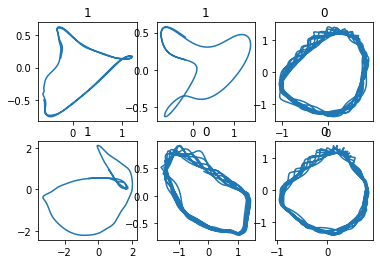

In [238]:
for i in range (6):
  plt.subplot(2, 3, i+1)
  plt.title(y_train[i])
  plt.plot(x_train[i,:999], x_train[i,1001:2000], color='tab:blue')
plt.show()

In [239]:
# Тут и далее уже очень много ошибок, покажу просто как правильно с комментариями.

class ShaftDataset(Dataset):
    def __init__(self, x, y, mode):
        # Проверка выборки
        if mode == 'train':
            self.x = x_train
            self.y = y_train
        elif mode == 'val':
            self.x = x_test
            self.y = y_test
            
        # Разбиение сделано по вашему примеру, но обращаю внимание,
        # что так в тренировочной выборке всего один пример со 2 классом. А в тестовой - только 2 класс/
        # Поэтому нужно как то примеры скомпоновать по-другому

    def __getitem__(self, index):
        return self.x[index], self.y[index]
  
    def __len__(self):
        return len(self.y)

In [240]:
# Создаем два отдельных датасета и их будем подавать в Loader.
# Изначально вы пытались сделать два среза по одному датасету и подавили в Loader. Так работать не будет

train_dataset = ShaftDataset(x_train, y_train, 'train')
test_dataset = ShaftDataset(x_test, y_test, 'val')


In [241]:
train_dataset[0]

(array([-0.24441516, -0.24281083, -0.24117884, ..., -0.50478244,
        -0.49985856, -0.49529323], dtype=float32), 1)

##*Hyper* parameters

In [242]:
input_size = x_train.shape[1]
hidden_size = 40 # Попробуйте для начала поменьше
num_classes = 3
num_epochs = 2000
batch_size = 20 # Bath size не может быть больше размера датасета (у вас 30 примеров)
out_c = 40
out_c1 = 80
out_c2 = 160
lr = 0.00005 # learning rate

In [243]:
# Loader генерирует тензоры следующего размера -
# (batch_size (размер батча - кол-во примеров в батче), m (кол-во признаков))
# Таким образом, размерностей 2, а не 4

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [244]:
# Размеры данных в датасетах

features, labels = train_dataset.x, train_dataset.y
print(features.shape, labels.shape)
features, labels = test_dataset.x, test_dataset.y
print(features.shape, labels.shape)
#samples = torch.from_numpy(samples)
#labels = torch.from_numpy(labels)

(1260, 2000) (1260,)
(360, 2000) (360,)


#Создание нейронной сети

In [245]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    #4000*1 > 2000#2
    self.l1_1 = nn.Sequential(nn.Conv1d(batch_size, out_c, 3, bias=False),
                            nn.ReLU(True),
                            nn.BatchNorm1d(1998))
    self.l1_2 = nn.Sequential(nn.Conv1d(out_c, out_c, 3, bias=False),
                            nn.ReLU(True),
                            nn.BatchNorm1d(1996))
    self.l1_3 = nn.Sequential(nn.Conv1d(out_c, out_c, 3, bias=False),
                            nn.ReLU(True),
                            nn.BatchNorm1d(1994))

    self.l2_1 = nn.Sequential(nn.Conv1d(out_c, out_c1, 3, stride=2, bias=False),
                            nn.ReLU(True),
                            nn.BatchNorm1d(996))
    self.l2_2 = nn.Sequential(nn.Conv1d(out_c1, out_c1, 3, bias=False),
                            nn.ReLU(True),
                            nn.BatchNorm1d(994))
    self.l2_3 = nn.Sequential(nn.Conv1d(out_c1, out_c1, 3, bias=False),
                            nn.ReLU(True),
                            nn.BatchNorm1d(992))

    self.l3_1 = nn.Sequential(nn.Conv1d(out_c1, out_c2, 3, stride=2, bias=False),
                            nn.ReLU(True),
                            nn.BatchNorm1d(495))
    self.l3_2 = nn.Sequential(nn.Conv1d(out_c2, out_c2, 3, bias=False),
                            nn.ReLU(True),
                            nn.BatchNorm1d(493))
    self.l3_3 = nn.Sequential(nn.Conv1d(out_c2, batch_size, 3, bias=False),
                            nn.ReLU(True),
                            nn.BatchNorm1d(491))

    self.flatten = nn.Flatten()
    
    self.l1 = nn.Linear(491, 32)
    self.drop = nn.Dropout(p=0.5)
    self.sigmoid = nn.Sigmoid() 
    self.l2 = nn.Linear(32, num_classes)

  def forward(self, x):
    out = self.l1_1(x)
    out = self.l1_2(out)
    out = self.l1_3(out)

    out = self.l2_1(out)
    out = self.l2_2(out)
    out = self.l2_3(out)

    out = self.l3_1(out)
    out = self.l3_2(out)
    out = self.l3_3(out)

    out = self.flatten(out)
    out = self.l1(out)
    out = self.drop(out)
    out = self.sigmoid(out)
    out = self.l2(out)
    return out
model = NeuralNet(input_size, hidden_size, num_classes)

# Модель также перемещаем в нужное место
model = model.to(device)
# loss and optimizer
L = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

Loss and optimizer

#Training loop

In [246]:
NN_ver = '2_6_cnn'
history = {'Train loss': [],
            'Val loss': [],
            'Train {}'.format(NN_ver): [],
            'Val {}'.format(NN_ver): []}

In [247]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  running_loss = 0
  for i, (features, labels) in enumerate(train_loader):
    features = features.to(device)
    labels = labels.to(device)

    #forward path
    outputs = model(features) # Подаем признаки на вход нейросети
    loss = L(outputs, labels)

    #backward path
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.no_grad():
      running_loss += loss.item()
    if (i+1) % 16 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
  history["Train loss"].append(running_loss / n_total_steps)
  history[f"Train {NN_ver}"].append(i+1)
    


Выходные данные были обрезаны до нескольких последних строк (5000).
epoch 334 / 2000, step 32/63, loss = 0.9475
epoch 334 / 2000, step 48/63, loss = 1.0539
epoch 335 / 2000, step 16/63, loss = 0.8798
epoch 335 / 2000, step 32/63, loss = 1.0057
epoch 335 / 2000, step 48/63, loss = 0.9518
epoch 336 / 2000, step 16/63, loss = 0.9221
epoch 336 / 2000, step 32/63, loss = 0.9754
epoch 336 / 2000, step 48/63, loss = 1.0907
epoch 337 / 2000, step 16/63, loss = 0.9310
epoch 337 / 2000, step 32/63, loss = 0.9656
epoch 337 / 2000, step 48/63, loss = 0.9764
epoch 338 / 2000, step 16/63, loss = 1.0524
epoch 338 / 2000, step 32/63, loss = 1.0137
epoch 338 / 2000, step 48/63, loss = 0.8253
epoch 339 / 2000, step 16/63, loss = 1.0127
epoch 339 / 2000, step 32/63, loss = 1.0549
epoch 339 / 2000, step 48/63, loss = 1.1119
epoch 340 / 2000, step 16/63, loss = 0.8821
epoch 340 / 2000, step 32/63, loss = 0.9787
epoch 340 / 2000, step 48/63, loss = 0.9794
epoch 341 / 2000, step 16/63, loss = 1.0476
epoch 34

In [248]:
outputs, labels

(tensor([[ 0.6146, -0.2288, -1.1286],
         [-3.5769, -1.3647,  3.7695],
         [-1.8111, -1.6287,  2.5756],
         [-2.0069,  2.0943, -0.9092],
         [-1.5287,  2.2253, -1.2406],
         [ 0.5029,  1.4524, -2.7506],
         [-0.3118,  1.0272, -1.5921],
         [-1.1663,  1.3441, -0.2815],
         [-2.9111, -2.8622,  5.4149],
         [-1.2543,  1.4602, -0.7382],
         [-0.5493,  0.6219, -0.4637],
         [-2.7356, -1.9694,  3.9402],
         [-1.3170, -0.3812,  0.8545],
         [ 0.5691, -0.4759, -0.4230],
         [ 1.9140, -1.1405, -1.3453],
         [-1.8372,  1.3235, -0.2582],
         [ 1.2663,  0.1964, -1.7387],
         [ 1.2049, -1.7441,  0.2769],
         [ 0.5073, -2.1937,  2.0266],
         [-0.6939,  0.9788, -1.0202]], grad_fn=<AddmmBackward0>),
 tensor([0, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1]))

#Test

In [249]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for features, labels in test_loader:
    features = features.to(device)
    labels = labels.to(device)
    outputs = model(features)
    print(outputs)
    #value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

tensor([[-4.3111,  2.0096,  1.5338],
        [-0.8801,  1.9278, -2.0527],
        [-3.1167,  1.4564,  0.5668],
        [ 1.7410, -0.5324, -1.4594],
        [ 3.1781, -0.2994, -2.7597],
        [ 2.1277, -0.3406, -1.8258],
        [ 1.8288, -0.6046, -0.5174],
        [ 3.1815, -1.5787, -1.4026],
        [-3.8541,  2.7347,  0.1575],
        [ 0.4417,  0.5555, -1.4621],
        [-3.9400,  1.9501,  1.1540],
        [ 0.9050,  0.1836, -1.6920],
        [ 0.3646,  0.2019, -0.8639],
        [-1.5123,  1.1950, -0.6957],
        [ 1.5050, -0.2874, -1.4704],
        [-1.3858,  1.4421, -0.6480],
        [ 1.2564, -0.6821, -1.5043],
        [ 1.5029, -0.7531, -0.6043],
        [ 1.0108, -0.0637, -1.3739],
        [-2.1623,  0.3707,  1.1837]])
tensor([[-1.6277,  1.5558, -0.4897],
        [-2.9205,  2.7112, -0.3972],
        [-2.3750,  0.6563,  0.6802],
        [ 2.6478, -0.5686, -2.4182],
        [-0.8417, -1.5666,  1.4812],
        [-2.2685,  1.4116,  0.3568],
        [ 2.4108,  0.6535, -3.1386],


# Accuracy

In [250]:
  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc} %')

accuracy = 64.72222222222223 %


# Графики

In [251]:
def plot_train_history(history):
    """Plot train history.

    Args:
        history (dict): Dict of lists with train history.
    """

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(17, 9))

    ax[0].plot(history['Train loss'], c='r')
    #ax[0].plot(history['Val loss'], c='g')
    ax[0].set_title('Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_yscale('log')
    ax[0].legend(['Train'])

    ax[1].plot(history[f'Train {NN_ver}'], c='r')
    #ax[1].plot(history[f'Val {NN_ver}'], c='g')
    ax[1].set_title(NN_ver)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel(NN_ver)
    ax[1].set_yscale('log')
    ax[1].legend(['Train'])

    plt.show()

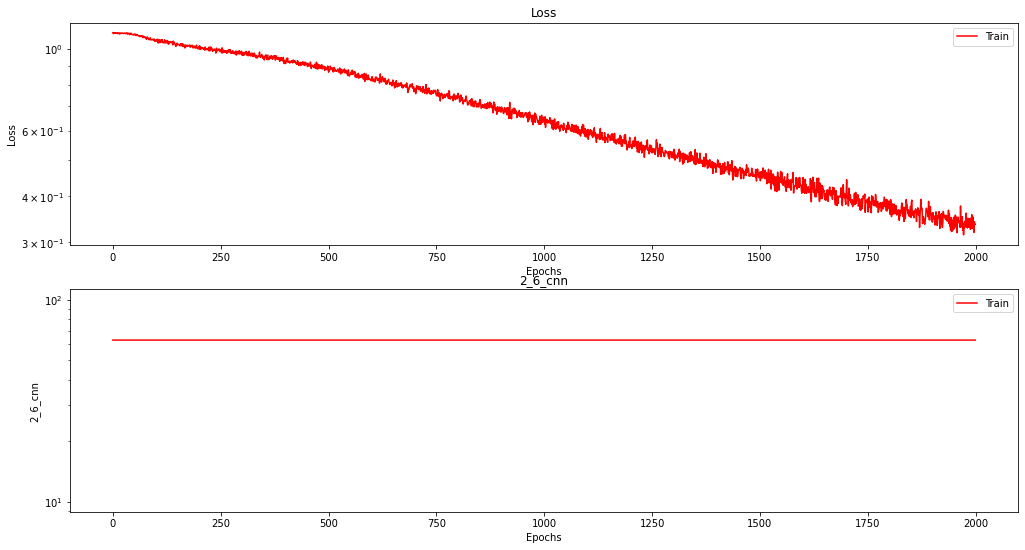

In [252]:
plot_train_history(history)

In [258]:
print(f'accuracy = {acc} %')
print(f'batch size = {batch_size} %')
print(f'learning rate = {lr} %')
print(f'numer of epochs = {num_epochs} %')
print('В свёрточной нейронной сети количество каналов: 20>40>80>160'
'структура нейросети: conv1d + relu + batchNormalise1d(1998, 1996, 1994'
                      'conv1d + relu + batchNormalise1d(996 и stride=2, 994, 992)'
                      'conv1d + relu + batchNormalise1d(495 и stride=2, 493, 491)'
                      'Flatten'
                      'Linear(491,32)'
                      'Dropout(p=0.5)'
                      'Sigmoid'
                      'Linear(32,3')
print(f'В одном файле {num_samples} графиков по {point_number} точек')

accuracy = 64.72222222222223 %
batch size = 20 %
learning rate = 5e-05 %
numer of epochs = 2000 %
В свёрточной нейронной сети количество каналов: 20>40>80>160структура нейросети: conv1d + relu + batchNormalise1d(1998, 1996, 1994conv1d + relu + batchNormalise1d(996 и stride=2, 994, 992)conv1d + relu + batchNormalise1d(495 и stride=2, 493, 491)FlattenLinear(491,32)Dropout(p=0.5)SigmoidLinear(32,3
В одном файле 20 графиков по 1000 точек
